# 🧠 Introduction to Neural Networks

## What is a Neural Network?
A **Neural Network (NN)** is a **computational model** inspired by the human brain.  
It consists of **neurons (nodes)** that process and pass information.

✅ **Used for:**  
- Image recognition  
- Speech processing  
- Classification & regression tasks  
- Natural Language Processing (NLP)  

## What is a Neuron?
A **neuron** is the fundamental unit of a neural network.  
It takes multiple inputs, applies **weights and biases**, and produces an output using an **activation function**.

### **Mathematical Representation**
Each neuron applies:  
$y = \sigma(Wx + b)$
where:
- W = Weights (importance of each input)
- x = Inputs
- b = Bias (adjusts the output)
- $\sigma$ = Activation function (e.g., Sigmoid, ReLU)

### **Weights and Biases**
These parameters are what we update when we talk about "training" a model. They are initialized to some random value or set to 0 and updated as the training progresses. The bias is analogous to a weight independent of any input node. Basically, it makes the model more flexible, since you can "move" the activation function around.

### **Activation function**
Are crucial because they introduce non-linearity, allowing the model to learn complex patterns. Without them, the network would behave like a simple linear regression model, no matter how many layers it has!

#### **Fun fact** [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem)
Single hidden layer neural network (with enough neurons and a non-linear activation function) can approximate any continuous function? 
![Neuron](neuron.png)
![Neuron (mathematical representation)](neuron-math.webp)


## Basic Structure of a Neural Network
A typical **Feedforward Neural Network** consists of:
- **Input Layer** - Takes input features (e.g., pixels, numerical data)
- **Hidden Layers** - Apply transformations using **weights & biases**
- **Output Layer** - Produces the final prediction

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output

from typing import Any

# Set the seed for reproducibility
np.random.seed(42)

In [198]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams["figure.figsize"] = [20, 10]

## What is XOR?
**XOR (Exclusive OR)** is a simple binary classification problem:

| Input 1 | Input 2 | Output |
|---------|---------|--------|
| 0       | 0       | 0      |
| 0       | 1       | 1      |
| 1       | 0       | 1      |
| 1       | 1       | 0      |

**Linear models (like Logistic Regression) fail** because XOR is **not linearly separable**.  
**Neural Networks can learn** nonlinear decision boundaries to solve XOR! 

In [199]:
# XOR input and output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 0])

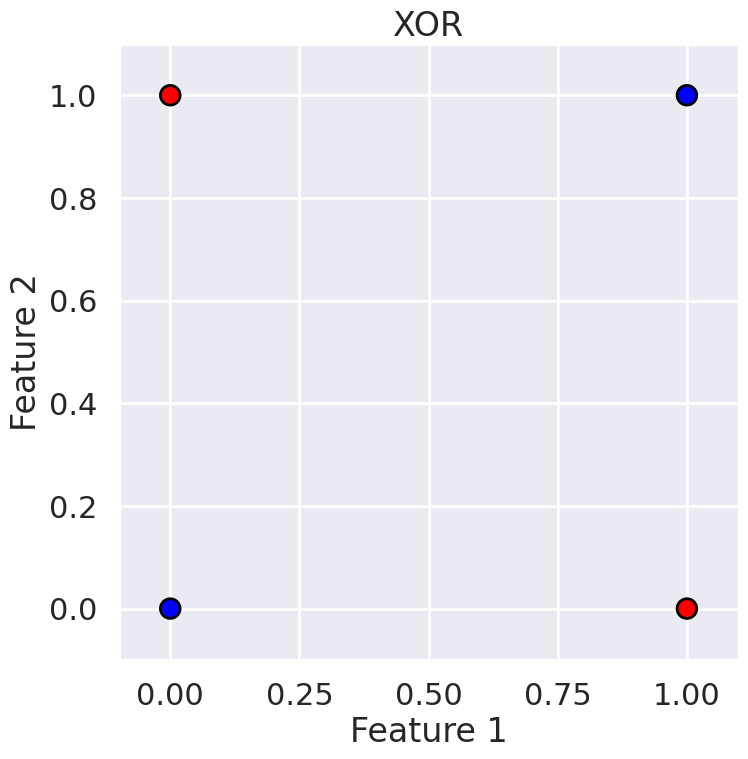

In [200]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k", s=200)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("XOR")
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.grid(True)

plt.show()

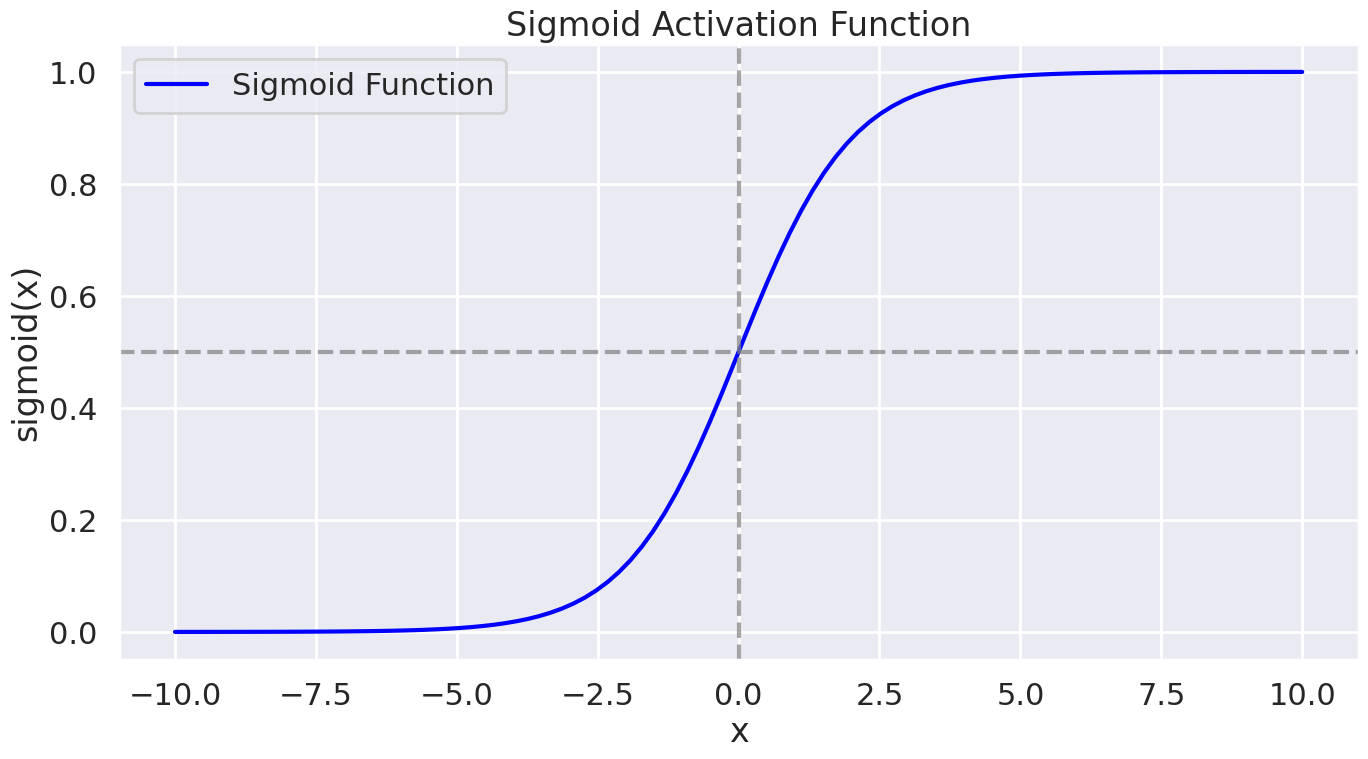

In [201]:
def sigmoid(x: np.ndarray[Any]) -> np.ndarray[Any]:
    return 1 / (1 + np.exp(-x))

def derivate_sigmoid(x: np.ndarray[Any]) -> np.ndarray[Any]:
    return x * (1 - x)

# generate x values
x = np.linspace(-10, 10, 100)

# compute sigmoid values
y_sigmoid = sigmoid(x)

# plot
plt.figure(figsize=(16, 8))
plt.plot(x, y_sigmoid, label="Sigmoid Function", color="blue")
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7)  # midpoint
plt.axvline(0, color='gray', linestyle='--', alpha=0.7)    # center

# set labels
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Activation Function")
plt.legend()
plt.grid(True)

# show plot
plt.show()

In [202]:
class Neuron:
    def __init__(self, input_size):
        # initialize weights and bias
        self.weights = np.random.rand(input_size) * 0.01
        self.bias = np.random.rand()
    
    def forward(self, inputs):
        # calculate the neuron's output
        total_input = np.dot(inputs, self.weights) + self.bias
        return sigmoid(total_input)


In [203]:
class NeuralNetwork:
    def __init__(self, hidden_size):
        # create a neural network with 2 input neurons, 2 hidden neurons, and 1 output neuron
        self.hidden_layer = [Neuron(2) for _ in range(hidden_size)]  # 2 hidden neurons
        self.output_neuron = Neuron(2)  # 1 output neuron
    
    def forward(self, inputs):
        # forward pass through the network
        hidden_outputs = np.array([neuron.forward(inputs) for neuron in self.hidden_layer])
        output = self.output_neuron.forward(hidden_outputs)
        
        return hidden_outputs, output
    
    def classify(self, datapoint):
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint)[1] >= 0.5:
            return 1
        
        return 0

    def train(self, X: np.ndarray[Any], y: np.ndarray[Any], epochs=10000, learning_rate=0.1):
        loss_history = []
        # Train the neural network using backpropagation
        for epoch in range(epochs):
            total_loss = 0
            for i in range(len(X)):
                inputs, target = X[i], y[i]

                # Forward pass
                hidden_outputs, output = self.forward(inputs)

                # Calculate the error (MSE)
                error_term = target - output

                # Calculate loss
                loss = error_term ** 2
                total_loss += 0.5 * np.sum(loss)

                # Backpropagation
                output_gradient = error_term * derivate_sigmoid(output)

                # Compute gradients for hidden layer
                hidden_gradients = np.array([output_gradient * self.output_neuron.weights[j] * derivate_sigmoid(hidden_outputs[j]) for j in range(2)])

                # Update output neuron weights and bias
                self.output_neuron.weights += learning_rate * output_gradient * hidden_outputs
                self.output_neuron.bias += learning_rate * output_gradient

                # Update hidden layer weights and biases
                for j, neuron in enumerate(self.hidden_layer):
                    neuron.weights += learning_rate * hidden_gradients[j] * inputs
                    neuron.bias += learning_rate * hidden_gradients[j]

            # average loss for the epoch
            avg_loss = total_loss / len(X)
            loss_history.append(avg_loss)

            if epoch % 250 == 0:
                clear_output(wait=True)
                self.plot_decision_boundary(X, y)

        return loss_history
    
    def plot_decision_boundary(self, X, y):
        # setting plot properties like size, theme and axis limits
        sns.set_style('darkgrid')
        plt.figure(figsize=(10, 10))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        for i in range(len(X)):
            plt.plot([X[i][0]],
                     [X[i][1]],
                     colors[y[i]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, 0.01)
        y_range = np.arange(-0.1, 1.1, 0.01)

        # creating a mesh to plot decision boundary
        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        # using the contourf function to create the plot
        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)
        plt.show()

    def plot_decision_boundary_3D(self, X, y):
        fig = plt.figure(figsize=(20, 16))
        ax = fig.add_subplot(111, projection='3d')

        # define a finer grid
        x_range = np.linspace(-0.1, 1.1, 100)  # increased resolution
        y_range = np.linspace(-0.1, 1.1, 100)
        xx, yy = np.meshgrid(x_range, y_range)

        # compute neural network output for each point in the meshgrid
        Z = np.array([[self.forward([x, y])[1] for x, y in zip(x_row, y_row)] for x_row, y_row in zip(xx, yy)])

        # plot surface with better color and transparency
        surf = ax.plot_surface(xx, yy, Z, cmap="coolwarm", alpha=0.7, edgecolor='none')

        # add color bar
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

        # scatter actual data points (XOR)
        for i in range(len(X)):
            ax.scatter(X[i, 0], X[i, 1], y[i], color="black", s=100, edgecolors="k", label="Data Points" if i == 0 else "")

        ax.set_xlabel("Feature 1", labelpad=20)
        ax.set_ylabel("Feature 2", labelpad=20)
        ax.set_zlabel("NN Output", labelpad=20)
        plt.show()

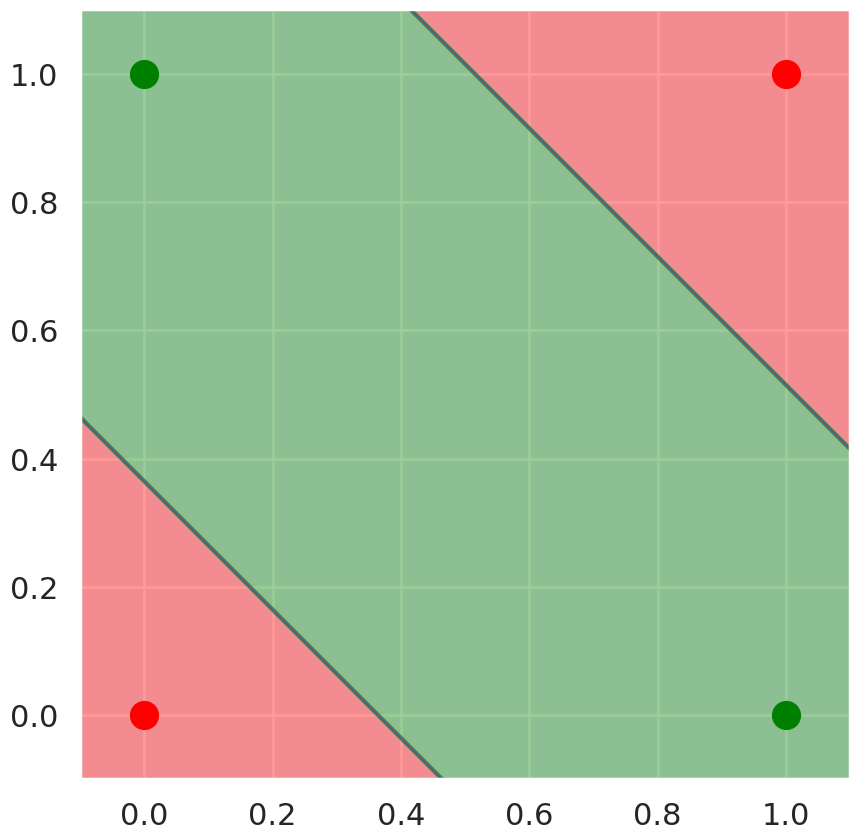

In [204]:
# create and train the neural network
nn = NeuralNetwork(hidden_size=2)
loss = nn.train(X, y, epochs=8000, learning_rate=0.2)

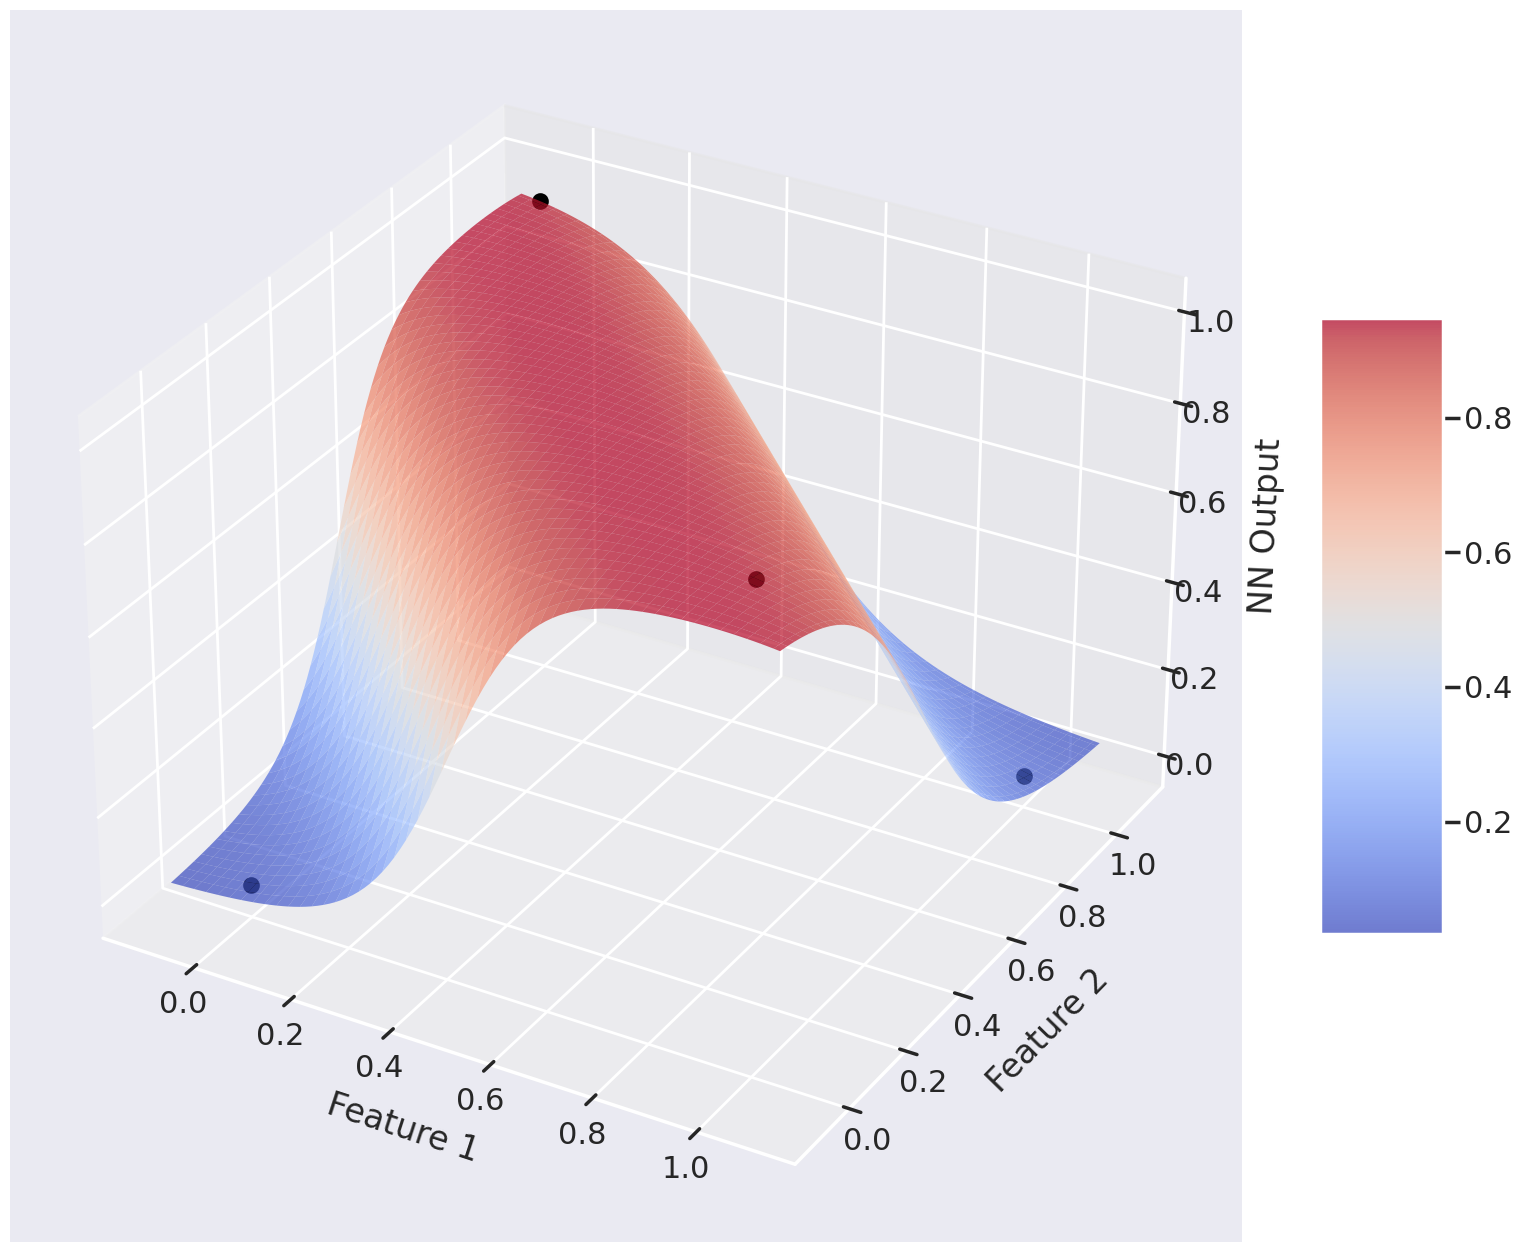

In [205]:
nn.plot_decision_boundary_3D(X, y)

In [206]:
import torch
import torch.nn as nn
import torch.optim as optim

X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
y = torch.Tensor([0,1,1,0]).reshape(-1,1)

# define the neural network model
class XORNeuralNetwork(nn.Module):
    def __init__(self):
        super(XORNeuralNetwork, self).__init__()
        self.hidden_layer = nn.Linear(2, 2)  # 2 input features to 2 hidden neurons
        self.output_layer = nn.Linear(2, 1)  # 2 hidden neurons to 1 output neuron

    def forward(self, x):
        x = torch.sigmoid(self.hidden_layer(x))
        x = torch.sigmoid(self.output_layer(x))
        return x

# create the neural network
model = XORNeuralNetwork()

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.2)

# training the neural network
epochs = 5000
loss_history = []

for epoch in range(epochs):
    for input, target in zip(X, y):
        optimizer.zero_grad() # zero the gradient buffers
        output = model(input)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step() # update weights
    
    # print average loss
    if epoch % 1000 == 0:
        print("Epoch {: >8} Loss: {}".format(epoch, loss.data.numpy()))

# test the trained model (disable gradient calculation)
with torch.no_grad():
    test_outputs = model(X)
    predictions = (test_outputs > 0.5).float()  # probabilities to binary predictions
    print(f'Predictions: {predictions.numpy().flatten()}')

Epoch        0 Loss: 0.301886647939682
Epoch     1000 Loss: 0.2542409896850586
Epoch     2000 Loss: 0.01374909933656454
Epoch     3000 Loss: 0.0025370747316628695
Epoch     4000 Loss: 0.001330793835222721
Predictions: [0. 1. 1. 0.]
